In [1]:
# Importing necessary libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings 
warnings.filterwarnings('ignore')

In [2]:
# data read
df =pd.read_csv("D:\Datascince_Project\Water Quality Prediction\Data\water_potability.csv")
df.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0


In [3]:
df.columns

Index(['ph', 'Hardness', 'Solids', 'Chloramines', 'Sulfate', 'Conductivity',
       'Organic_carbon', 'Trihalomethanes', 'Turbidity', 'Potability'],
      dtype='object')

# **About Dataset :-**
1. ph = pH of water 
2. Hardness = Capacity of water to preciplitate soap in mg/L
3. Solids = Total dissolved solids in ppm
4. Chloramines = Amount of Sulfates dissolved in mg/L
5. Sulfate = Amount of Sulfates dissoved in mg/L
6. Conductivity = Electrical conductivity of water µS/cm
7. Organic_carbon = Amount of organic carbon in ppm
8. Trihalomethanes = Amount of Trihalomethanes in µg/L
9. Turbidity = Measure of light emiting property of water in NTU (Nephelometric turbidity Units)
10. Potability = Indicates if water is safe for human consumption

In [4]:
df.shape # rows and columns

(3276, 10)

#### **Data Cleaning and Missing values handaling**

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               2785 non-null   float64
 1   Hardness         3276 non-null   float64
 2   Solids           3276 non-null   float64
 3   Chloramines      3276 non-null   float64
 4   Sulfate          2495 non-null   float64
 5   Conductivity     3276 non-null   float64
 6   Organic_carbon   3276 non-null   float64
 7   Trihalomethanes  3114 non-null   float64
 8   Turbidity        3276 non-null   float64
 9   Potability       3276 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 256.1 KB


In [6]:
df.isnull().sum()

ph                 491
Hardness             0
Solids               0
Chloramines          0
Sulfate            781
Conductivity         0
Organic_carbon       0
Trihalomethanes    162
Turbidity            0
Potability           0
dtype: int64

The dataset contains 3276 rows of data and out of 3276 data ph columns contains 491 null-values, sulfate contains 781 null- values and Trihalomethanes has 162 null-values.

In [7]:
df.describe()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
count,2785.000000,3276.000000,3276.000000,3276.000000,2495.000000,3276.000000,3276.000000,3114.000000,3276.000000,3276.000000
mean,7.080795,196.369496,22014.092526,7.122277,333.775777,426.205111,14.284970,66.396293,3.966786,0.390110
std,1.594320,32.879761,8768.570828,1.583085,41.416840,80.824064,3.308162,16.175008,0.780382,0.487849
min,0.000000,47.432000,320.942611,0.352000,129.000000,181.483754,2.200000,0.738000,1.450000,0.000000
25%,6.093092,176.850538,15666.690297,6.127421,307.699498,365.734414,12.065801,55.844536,3.439711,0.000000
50%,7.036752,196.967627,20927.833607,7.130299,333.073546,421.884968,14.218338,66.622485,3.955028,0.000000
75%,8.062066,216.667456,27332.762127,8.114887,359.950170,481.792304,16.557652,77.337473,4.500320,1.000000
max,14.000000,323.124000,61227.196008,13.127000,481.030642,753.342620,28.300000,124.000000,6.739000,1.000000


In [8]:
# filling the null values 
df.fillna(df.mean(),inplace=True)


In [9]:
df

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,7.080795,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,333.775777,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,333.775777,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0
...,...,...,...,...,...,...,...,...,...,...
3271,4.668102,193.681735,47580.991603,7.166639,359.948574,526.424171,13.894419,66.687695,4.435821,1
3272,7.808856,193.553212,17329.802160,8.061362,333.775777,392.449580,19.903225,66.396293,2.798243,1
3273,9.419510,175.762646,33155.578218,7.350233,333.775777,432.044783,11.039070,69.845400,3.298875,1
3274,5.126763,230.603758,11983.869376,6.303357,333.775777,402.883113,11.168946,77.488213,4.708658,1


In [10]:
df.isnull().sum()

ph                 0
Hardness           0
Solids             0
Chloramines        0
Sulfate            0
Conductivity       0
Organic_carbon     0
Trihalomethanes    0
Turbidity          0
Potability         0
dtype: int64

#### **Exploratory Data Analysis**

In [11]:
df.describe()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
count,3276.000000,3276.000000,3276.000000,3276.000000,3276.000000,3276.000000,3276.000000,3276.000000,3276.000000,3276.000000
mean,7.080795,196.369496,22014.092526,7.122277,333.775777,426.205111,14.284970,66.396293,3.966786,0.390110
std,1.469956,32.879761,8768.570828,1.583085,36.142612,80.824064,3.308162,15.769881,0.780382,0.487849
min,0.000000,47.432000,320.942611,0.352000,129.000000,181.483754,2.200000,0.738000,1.450000,0.000000
25%,6.277673,176.850538,15666.690297,6.127421,317.094638,365.734414,12.065801,56.647656,3.439711,0.000000
50%,7.080795,196.967627,20927.833607,7.130299,333.775777,421.884968,14.218338,66.396293,3.955028,0.000000
75%,7.870050,216.667456,27332.762127,8.114887,350.385756,481.792304,16.557652,76.666609,4.500320,1.000000
max,14.000000,323.124000,61227.196008,13.127000,481.030642,753.342620,28.300000,124.000000,6.739000,1.000000


In [12]:
df.nunique()

ph                 2786
Hardness           3276
Solids             3276
Chloramines        3276
Sulfate            2496
Conductivity       3276
Organic_carbon     3276
Trihalomethanes    3115
Turbidity          3276
Potability            2
dtype: int64

 **Checking if we need to do Dimensonility Reduction**

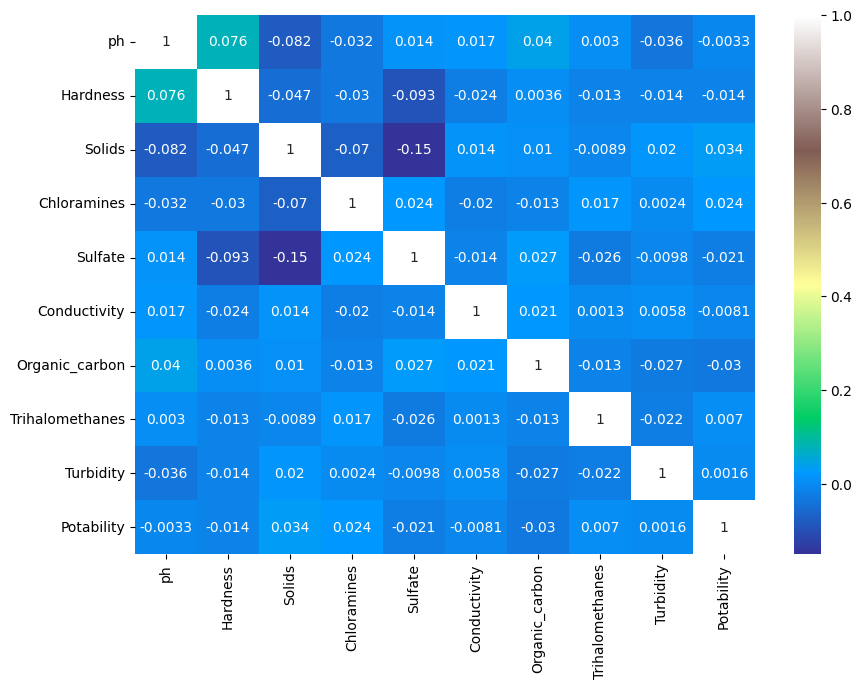

In [15]:
sns.heatmap(df.corr(),annot=True, cmap = 'terrain')

fig = plt.gcf()
fig.set_size_inches(10,7)
plt.show()

We Can't drop any dimension here.

In [16]:
# checking the duplicate value
df.duplicated().sum()

0

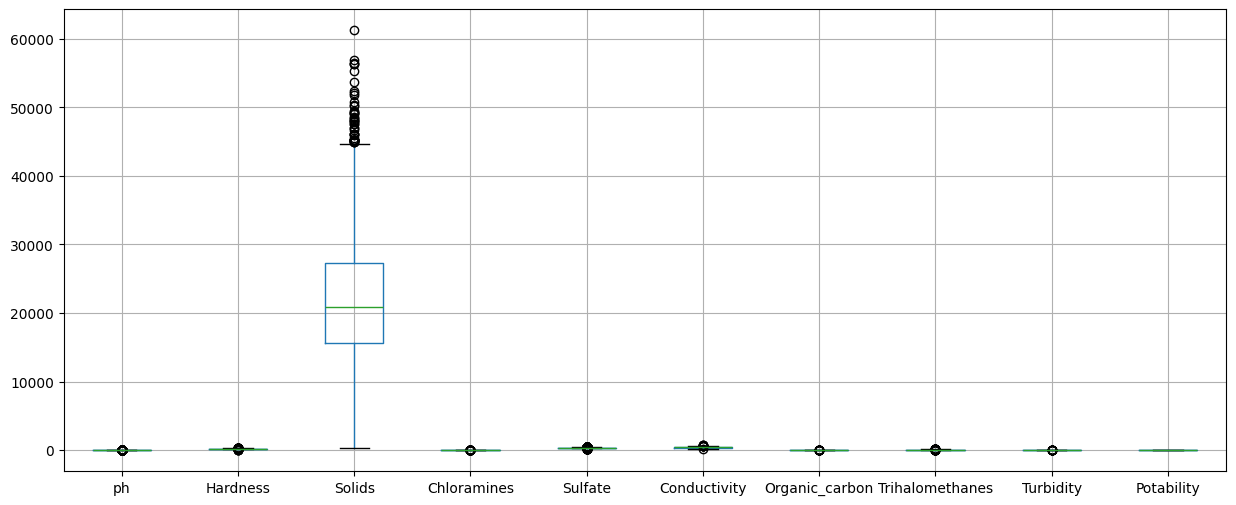

In [19]:
#  Let's get the outlier using Box Plot
df.boxplot(figsize=(15,6))
plt.show()


In [20]:
df['Solids'].describe()

count     3276.000000
mean     22014.092526
std       8768.570828
min        320.942611
25%      15666.690297
50%      20927.833607
75%      27332.762127
max      61227.196008
Name: Solids, dtype: float64

Not removing the Outliers coz they may be importatnt to decide the quality of water.

**Here we don't need do label encoding because there are no string values.**

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               3276 non-null   float64
 1   Hardness         3276 non-null   float64
 2   Solids           3276 non-null   float64
 3   Chloramines      3276 non-null   float64
 4   Sulfate          3276 non-null   float64
 5   Conductivity     3276 non-null   float64
 6   Organic_carbon   3276 non-null   float64
 7   Trihalomethanes  3276 non-null   float64
 8   Turbidity        3276 non-null   float64
 9   Potability       3276 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 256.1 KB


In [38]:
p=df['Potability'].value_counts()
p

Potability
0    1998
1    1278
Name: count, dtype: int64

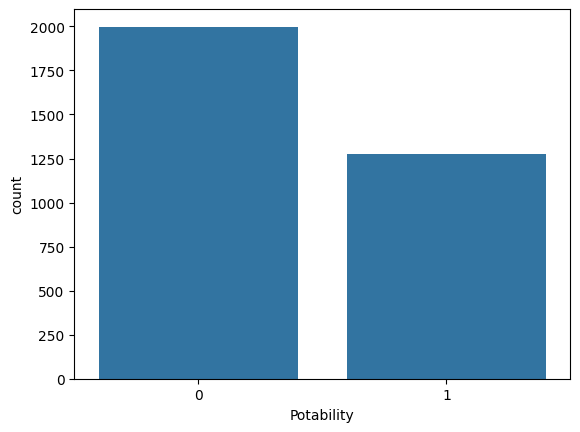

In [39]:
# let's check the balance of data
sns.countplot(x='Potability',data =df ,)
plt.show()

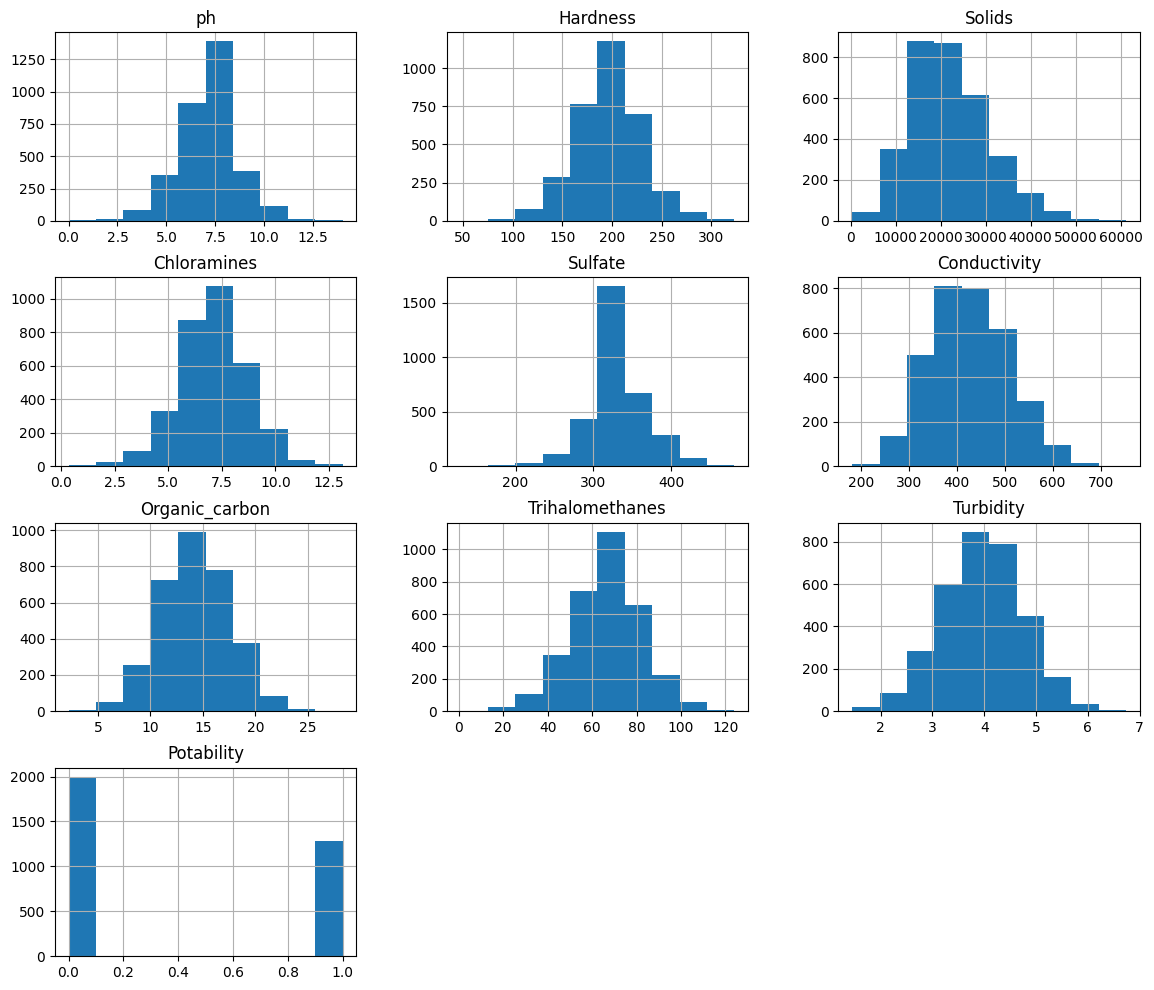

In [32]:
df.hist(figsize=(14,12))
plt.show()


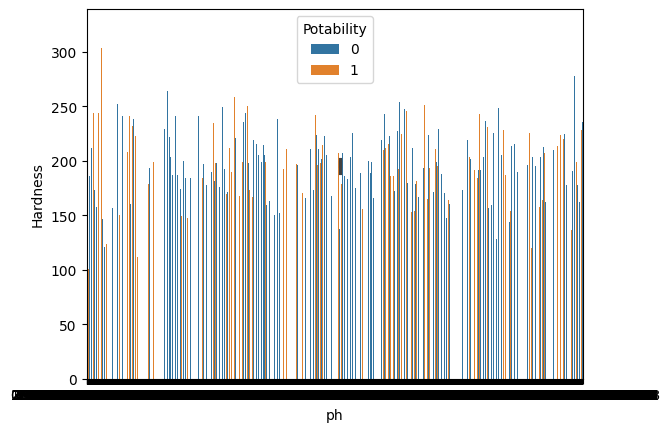

In [34]:
sns.barplot(x=df['ph'], y=df['Hardness'] ,hue=df['Potability'])
plt.show()

<Axes: xlabel='ph', ylabel='Potability'>

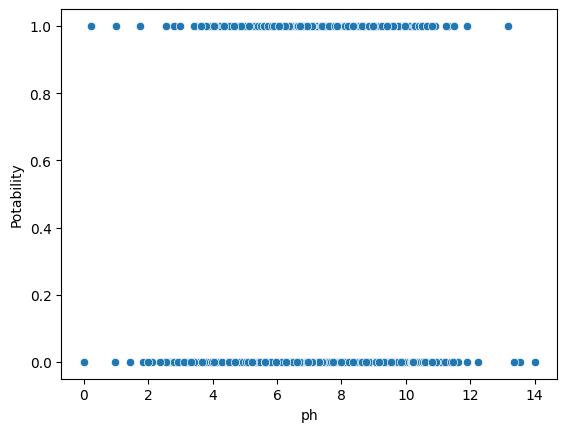

In [35]:
sns.scatterplot(x=df['ph'],y=df['Potability'])

0 => Water is bad.
1 => Water is good.

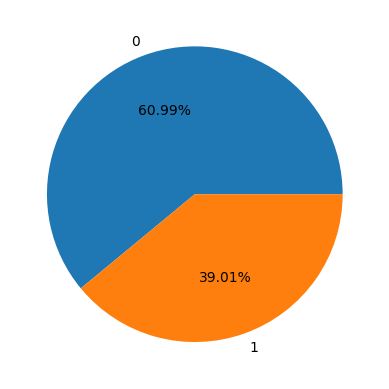

In [40]:
plt.pie(x=p.values, labels=p.index, autopct='%.2f%%')
plt.show()

* if Depended (y) has an imbalance values in categorical data we can't predict a model . so wee need to balaced data for this we will use Synthetic Minority Over-sampling Technique (SMOTE).

**Feature Engineering**

In [48]:
X = df.drop(columns=['Potability'])
y = df.Potability

In [50]:
# Scaling the data to predict one outcomes.
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_scaled = sc.fit_transform (X)
X_scaled = pd.DataFrame(X_scaled, columns=X.columns)

In [51]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_scaled,y, test_size=0.3,random_state=0)


In [54]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=42)


In [55]:
# Aapplying the smote to train data only
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)


In [56]:
y_train_resampled.value_counts()

Potability
0    1388
1    1388
Name: count, dtype: int64

In [57]:
y_train.value_counts()

Potability
0    1388
1     905
Name: count, dtype: int64

In [58]:
## LogisticRegression
from sklearn.linear_model import LogisticRegression
lr_model = LogisticRegression(max_iter=500,random_state=42)
lr_model.fit(X_train_resampled,y_train_resampled )

LogisticRegression(max_iter=500, random_state=42)

In [59]:
y_pred_lr = lr_model.predict(X_test)

In [63]:
from sklearn.metrics import accuracy_score,recall_score,precision_score,f1_score,ConfusionMatrixDisplay

In [72]:
print(f'accuracy :{accuracy_score(y_test,y_pred_lr)}')
print(f'precision :{precision_score(y_test,y_pred_lr)}')
print(f'recall :{recall_score(y_test,y_pred_lr)}')
print(f'f1 : {f1_score(y_test,y_pred_lr)}')


accuracy :0.5198372329603256
precision :0.39835728952772076
recall :0.5201072386058981
f1 : 0.45116279069767445


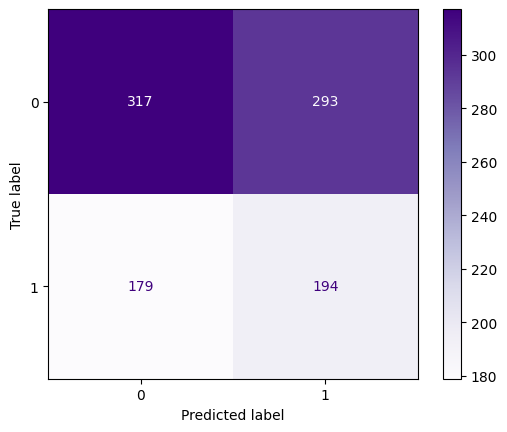

In [77]:
# Confusion metrix of Logistic regression
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

y_pred_lr = lr_model.predict(X_test)
cm = confusion_matrix(y_test, y_pred_lr)
display = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=lr_model.classes_)
display.plot(cmap='Purples')

In [73]:
## Support Vector machine
from sklearn.svm import SVC
svm_model = SVC(random_state=42)
svm_model.fit(X_train_resampled,y_train_resampled )


SVC(random_state=42)

In [74]:
y_pred_svm = svm_model.predict(X_test)

In [75]:
print(f'accuracy :{accuracy_score(y_test,y_pred_svm)}')
print(f'precision :{precision_score(y_test,y_pred_svm)}')
print(f'recall :{recall_score(y_test,y_pred_svm)}')
print(f'f1 : {f1_score(y_test,y_pred_svm)}')

accuracy :0.6683621566632757
precision :0.561038961038961
recall :0.579088471849866
f1 : 0.5699208443271767


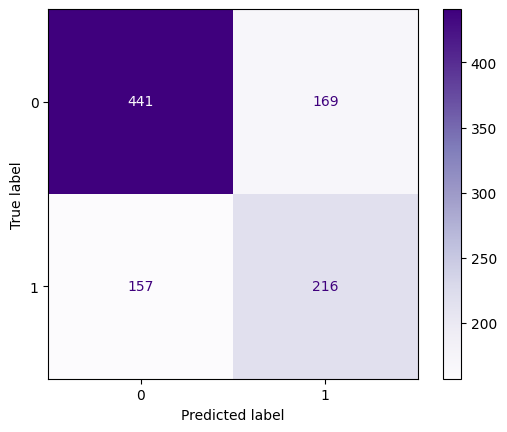

In [79]:
# confusionmatrix of SVM
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

y_pred_svm = svm_model.predict(X_test)
cm = confusion_matrix(y_test, y_pred_svm)
display = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=lr_model.classes_)
display.plot(cmap='Purples')